# 🧹 Step 2 - Data Analysis and Visualization

## 📚 Course 4: Data Cleaning and Analysis

## 4️⃣ Working with Strings in Pandas

---

👦 [Anh-Thi DINH](https://dinhanhthi.com) — 🔥 [dataquest-aio](https://github.com/dinhanhthi/dataquest-aio) on Github — 🌏 [Dataquest](https://dataquest.io/)

⚡ **Note**: Some errors in this notebook appear intentionally to illustrate the wrong commands.

❓ You run this notebook on Google Colab? If "Yes", please replace `0` by `1` in the below cell and run it first.

In [1]:
use_colab = 0 # 1 if you use Google Colab to read/run this notebook

## 📝 Mission 346

⏬ Download the takeaway for this mission in folder `/takeaways/` [on Github](https://github.com/dinhanhthi/dataquest-aio/tree/master/takeaways). [Source](https://app.dataquest.io/m/346/working-with-strings-in-pandas) of this mission.

🎯 In this mission, we'll learn a couple other string cleaning tasks such as:

- Finding specific strings or substrings in columns
- Extracting substrings from unstructured data
- Removing strings or substrings from a series

In [84]:
import pandas as pd # import pandas package
import numpy as np
import matplotlib.pyplot as plt # plot

# show the plots inside the notebook
%matplotlib inline 

In this mission, we are going to work on 2 datasets: the 2015 World Happiness Report (again) and additional economic data from the World Bank. First, we need to load these datasets.

In [7]:
if use_colab:
    dataquest_aio = 'https://raw.githubusercontent.com/dinhanhthi/dataquest-aio/master/step-2-data-analysis-and-visualization/'
    dataset_2015_url = dataquest_aio + 'course-4-data-cleaning-and-analysis/data/World_Happiness_2015.csv'
    dataset_world_url = dataquest_aio + 'course-4-data-cleaning-and-analysis/data/World_dev.csv'
else: # if you use localhost
    dataset_2015_url = './data/World_Happiness_2015.csv'
    dataset_world_url = './data/World_dev.csv'

In [8]:
happiness2015 = pd.read_csv(dataset_2015_url) # read the data set
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Recall the meaning of columns:

- `Country` - Name of the country.
- `Region` - Name of the region the country belongs to.
- `Happiness Rank` - The rank of the country, as determined by its happiness score.
- `Happiness Score` - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
- `Family` - The estimated extent to which family contributes to the happiness score.
- `Freedom` - The estimated extent to which freedom contributes to the happiness score.
- `Generosity` - The estimated extent to which generosity contributes to the happiness score.

In [9]:
world_dev = pd.read_csv(dataset_world_url)
world_dev.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


Below are descriptions for the columns we'll be working with:

- `ShortName` - Name of the country
- `Region` - The region the country belongs to
- `IncomeGroup` - The income group the country belongs to, based on Gross National Income (GNI) per capita
- `CurrencyUnit` - Name of country's currency
- `SourceOfMostRecentIncomeAndExpenditureData` - The name of the survey used to collect the income and expenditure data
- `SpecialNotes` - Contains any miscellaneous notes about the data

❓ Combien 2 datasets!

💡 Let use `pd.merge()` as in the [previous task](https://github.com/dinhanhthi/dataquest-aio/blob/master/step-2-data-analysis-and-visualization/course-4-data-cleaning-and-analysis/task-2-combining-data-with-pandas.ipynb).

In [11]:
merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country', right_on='ShortName')

# there is a column who has a very long name "SourceOfMostRecentIncomeAndExpenditureData", we need to rename it
merged.rename({'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}, axis=1, inplace=True)
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


In [13]:
# how many columns in merged?
len(merged.columns)

43

There are a lot of columns that we don't need. Let's only keep some.

In [14]:
kept_col = ['Country', 'Happiness Rank', 'Happiness Score', 
            'CountryCode', 'ShortName', 'CurrencyUnit', 'IncomeGroup',
           'SpecialNotes', 'IESurvey']

merged = merged[kept_col]
merged.head()

,Country,Happiness Rank,Happiness Score,CountryCode,ShortName,CurrencyUnit,IncomeGroup,SpecialNotes,IESurvey
0,Switzerland,1,7.587,CHE,Switzerland,Swiss franc,High income: OECD,NaN,"Expenditure survey/budget survey (ES/BS), 2004"
1,Iceland,2,7.561,ISL,Iceland,Iceland krona,High income: OECD,NaN,"Integrated household survey (IHS), 2010"
2,Denmark,3,7.527,DNK,Denmark,Danish krone,High income: OECD,NaN,"Income tax registers (ITR), 2010"
3,Norway,4,7.522,NOR,Norway,Norwegian krone,High income: OECD,NaN,"Income survey (IS), 2010"
4,Canada,5,7.427,CAN,Canada,Canadian dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,"Labor force survey (LFS), 2010"


## 👉 Vectorized string methods

Take a look at `CurrencyUnit` column, we don't want its values contain the country, i.e. instead of `Swiss franc`, we just need `franc`, for example.

❓ How can we remove the country from the value of `CurrencyUnit` column?

💡 We can use `string.split()` [method](https://docs.python.org/3/library/stdtypes.html) for each string (each row in the column) and `Series.apply()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) to apply `.split` to all rows of the column.

In [15]:
def extract_last_word(element):
    return str(element).split()[-1] # take the last word after splitting

merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word) # create a new column
merged.head()

C:\Users\dinha\.conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Country,Happiness Rank,Happiness Score,CountryCode,ShortName,CurrencyUnit,IncomeGroup,SpecialNotes,IESurvey,Currency Apply
0,Switzerland,1,7.587,CHE,Switzerland,Swiss franc,High income: OECD,NaN,"Expenditure survey/budget survey (ES/BS), 2004",franc
1,Iceland,2,7.561,ISL,Iceland,Iceland krona,High income: OECD,NaN,"Integrated household survey (IHS), 2010",krona
2,Denmark,3,7.527,DNK,Denmark,Danish krone,High income: OECD,NaN,"Income tax registers (ITR), 2010",krone
3,Norway,4,7.522,NOR,Norway,Norwegian krone,High income: OECD,NaN,"Income survey (IS), 2010",krone
4,Canada,5,7.427,CAN,Canada,Canadian dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,"Labor force survey (LFS), 2010",dollar


It works but there are some warnings! This warning says that, we should use `df.loc[column_i, row_j]` than using `df[column_i][row_j]`. However, it's not our interest now. Let's move on.

⭐ And in this case, we've used `.apply` method whereas we should use a vectorized method if I could. Luckily, pandas supports some built in vectorized methods for Series. You can check the full list [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).

Let's play with them a little bit before remaking the main task.

In [17]:
merged['CurrencyUnit'].str[0:5][:5] # access the first 5 characters in each element 

0    Swiss
1    Icela
2    Danis
3    Norwe
4    Canad
Name: CurrencyUnit, dtype: object

In [20]:
merged['CurrencyUnit'].str.upper()[:5] # convert all strings of each element to uppercase

0        SWISS FRANC
1      ICELAND KRONA
2       DANISH KRONE
3    NORWEGIAN KRONE
4    CANADIAN DOLLAR
Name: CurrencyUnit, dtype: object

In [23]:
merged['CurrencyUnit'].str.upper().str.split()[:5] # apply 2 different methods

0        [SWISS, FRANC]
1      [ICELAND, KRONA]
2       [DANISH, KRONE]
3    [NORWEGIAN, KRONE]
4    [CANADIAN, DOLLAR]
Name: CurrencyUnit, dtype: object

In [36]:
# come back to our main task
merged['Currency Vectorized'] = merged.loc[:, 'CurrencyUnit'].str.split().str.get(-1)
merged['Currency Vectorized'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

It seems that the `caveats` warning still appears but maybe it's wrong this time (read [this](https://www.dataquest.io/blog/settingwithcopywarning/) to understand more about it). We can ignore it by,

In [35]:
pd.options.mode.chained_assignment = None  # default='warn'
# rerun previous code cell to see the difference

In [37]:
# check if there are missing values in a column
merged['CurrencyUnit'].isnull().sum() 
# first, we apply `isnull()` to check the missing values in each row; 
#   then we sum of all result (which is True/False, also 0/1)

13

So, there are 13 missing values in column `CurrencyUnit`.

👉 Next, we'd like to count the length of each currency unit in the column `CurrencyUnit` and then check how many of "that length" in the column.

In [39]:
lengths = merged['CurrencyUnit'].str.len() # find len of each string in each row in the column
value_counts = lengths.value_counts(dropna=False) # count the result
value_counts

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

⭐ So far, we know that there are 3 benefit of using vectorized string methods:

1. Better performance
2. Code that is easier to read and write
3. Automatically excludes missing values

## 👉 Regular Expressions (RegEx)

❓ Take a look on the column `SpecialNotes`, we wanna find comments containing phrase `national accounts`. But how?

💡 Using **Regular Expressions** (RegEx)! Read [this](https://docs.python.org/3.4/library/re.html) to know how to use regex in python.

In [40]:
merged.head()

,Country,Happiness Rank,Happiness Score,CountryCode,ShortName,CurrencyUnit,IncomeGroup,SpecialNotes,IESurvey,Currency Apply,Currency Vectorized
0,Switzerland,1,7.587,CHE,Switzerland,Swiss franc,High income: OECD,NaN,"Expenditure survey/budget survey (ES/BS), 2004",franc,franc
1,Iceland,2,7.561,ISL,Iceland,Iceland krona,High income: OECD,NaN,"Integrated household survey (IHS), 2010",krona,krona
2,Denmark,3,7.527,DNK,Denmark,Danish krone,High income: OECD,NaN,"Income tax registers (ITR), 2010",krone,krone
3,Norway,4,7.522,NOR,Norway,Norwegian krone,High income: OECD,NaN,"Income survey (IS), 2010",krone,krone
4,Canada,5,7.427,CAN,Canada,Canadian dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,"Labor force survey (LFS), 2010",dollar,dollar


⭐ Although we can use `re` package but luckily, refex is integrated in pandas with vectorized string methods to make finding and extracting patterns of characters easier.

In [43]:
pattern = r"[Nn]ational accounts" # National or national are accepted!
national_accounts = merged['SpecialNotes'].str.contains(pattern) # find comments containing the pattern
print(national_accounts.head(7))

0      NaN
1      NaN
2      NaN
3      NaN
4     True
5    False
6    False
Name: SpecialNotes, dtype: object


In [44]:
# how many of comments containing this pattern?
national_accounts.value_counts(dropna=False)

NaN      65
True     54
False    39
Name: SpecialNotes, dtype: int64

❓ Return only the rows that contain "national accounts" or "National accounts" in the `SpecialNotes` column:

In [46]:
merged[national_accounts]

ValueError: cannot index with vector containing NA / NaN values

Because `national_accounts` has `NaN` values, we cannot apply it to `merged`. We need to change all values `NaN` to `False` so that we don't consider it.

In [49]:
national_accounts = merged['SpecialNotes'].str.contains(r"[Nn]ational accounts", na=False) # replace na by False
merged[national_accounts].head() # df contains only the comments going with the pattern.

,Country,Happiness Rank,Happiness Score,CountryCode,ShortName,CurrencyUnit,IncomeGroup,SpecialNotes,IESurvey,Currency Apply,Currency Vectorized
4,Canada,5,7.427,CAN,Canada,Canadian dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,"Labor force survey (LFS), 2010",dollar,dollar
7,Sweden,8,7.364,SWE,Sweden,Swedish krona,High income: OECD,Fiscal year end: June 30; reporting period for...,"Income survey (IS), 2005",krona,krona
8,New Zealand,9,7.286,NZL,New Zealand,New Zealand dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,NaN,dollar,dollar
9,Australia,10,7.284,AUS,Australia,Australian dollar,High income: OECD,Fiscal year end: June 30; reporting period for...,"Expenditure survey/budget survey (ES/BS), 2003",dollar,dollar
14,United States,15,7.119,USA,United States,U.S. dollar,High income: OECD,Fiscal year end: September 30; reporting perio...,"Labor force survey (LFS), 2010",dollar,dollar


❓ We wanna extract any year from `SpecialNotes` columns.

💡 The years follow following pattern

<img src="img/Years.png" width="250"/>

In [59]:
pattern = r"([1-2][0-9]{3})" # [0-9] appears 3 times
merged['SpecialNotes'].str.extract(pattern, expand=True)[20:25] # check some
# expand=True : return the results as a dataframe

,0
20,NaN
21,2010
22,NaN
23,1993
24,2007


⭐ Remark:

- `.str.extract()`: extract only the first match.
- `.str.extractall()`: extract all matches.

In [63]:
merged = merged.set_index('Country') # make "Country" column as the index
merged.head()

,Happiness Rank,Happiness Score,CountryCode,ShortName,CurrencyUnit,IncomeGroup,SpecialNotes,IESurvey,Currency Apply,Currency Vectorized
Country,,,,,,,,,,
Switzerland,1,7.587,CHE,Switzerland,Swiss franc,High income: OECD,NaN,"Expenditure survey/budget survey (ES/BS), 2004",franc,franc
Iceland,2,7.561,ISL,Iceland,Iceland krona,High income: OECD,NaN,"Integrated household survey (IHS), 2010",krona,krona
Denmark,3,7.527,DNK,Denmark,Danish krone,High income: OECD,NaN,"Income tax registers (ITR), 2010",krone,krone
Norway,4,7.522,NOR,Norway,Norwegian krone,High income: OECD,NaN,"Income survey (IS), 2010",krone,krone
Canada,5,7.427,CAN,Canada,Canadian dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,"Labor force survey (LFS), 2010",dollar,dollar


❌ Note that, if you run above line of code 2nd time, there is an error telling us that there is no column called `Country`. It's because we already made this column as the index. It's not a column ever!

In [67]:
pattern = r"(?P<Years>[1-2][0-9]{3})" # we name the capturing group "Years"
merged['SpecialNotes'].str.extractall(pattern).head()

Years
Country     match      
Finland     0      1999
            1      1999
Netherlands 0      1999
            1      2037
            2      1999

<img src="img/Extractall.png" width="400"/>

❓ Take a look on column `IESurvey`. This column has years in two different formats: `2012`, `2010/11`. Let's extract all years from this column.

<tr>
    <td> <img src="img/Years_updated.png" width="250"/> </td>
    <td> <img src="img/Years_first_group.png" width="250"/> </td>
    <td> <img src="img/Years_all_groups.png" width="250"/> </td>
</tr>

In [80]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
years.tail()

,,First_Year,Second_Year
Country,match,,
Afghanistan,0,2008,NaN
Rwanda,0,2010,11
Benin,0,2011,12
Burundi,0,2006,NaN
Togo,0,2011,NaN


⭐ **Explain**:

- `?` after each of the two new groups to indicate that a match for those groups is optional. In this case, `/` and the year after `/` is optional (there are some row having them, there are some not having them).
- Each group of expression much be put inside a `()`. If we don't put this parenthese, the result will not contain it (for example, the result doesn't have column `/`).
- If there are duplicates, you can use `{}`.

In [82]:
first_two_year = years['First_Year'].str[0:2] # take first 2 digits of the First Year
years['Second_Year'] = first_two_year + years['Second_Year'] # add these 2 digits to the Second Year
years.tail()

,,First_Year,Second_Year
Country,match,,
Afghanistan,0,2008,NaN
Rwanda,0,2010,202011
Benin,0,2011,202012
Burundi,0,2006,NaN
Togo,0,2011,NaN


👉 Next, we'll group `merged` by the `IncomeGroup` column and plot the results but let's clean the values in it first.

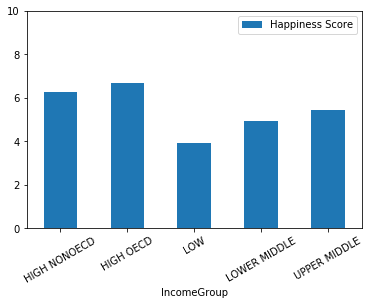

In [86]:
# remove "income", ":" and redundant spaces.
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()

pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')

pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))
plt.show()